# Assignment - Sentiment Analysis of Movie Reviews

![](https://i.imgur.com/6Wfmf2S.png)

> **Problem Statement**: Apply the TF-IDF technique to train ML models for sentiment analysis using data from the "[Sentiment Analysis on Movie Reviews](https://www.kaggle.com/c/sentiment-analysis-on-movie-reviews)" Kaggle competition.


Outline:

1. Download and Explore Dataset
2. Implement the TF-IDF Technique
3. Train baseline model & submit to Kaggle
4. Train & finetune different ML models
3. Document & submit your notebook


Dataset: https://www.kaggle.com/c/sentiment-analysis-on-movie-reviews


## Download and Explore the Data

Outline:

1. Download Dataset from Kaggle
2. Explore and visualize data

### Download Dataset from Kaggle

- Read the "Description", "Evaluation" and "Data" sections on the Kaggle competition page carefully
- Make sure to download the `kaggle.json` file from your [Kaggle account](https://kaggle.com/me/account) and upload it on Colab

In [9]:
import os

In [10]:
!pwd

/content


In [11]:
os.environ['KAGGLE_CONFIG_DIR']='/content'

In [12]:
!kaggle competitions download -c sentiment-analysis-on-movie-reviews

  0% 0.00/1.90M [00:00<?, ?B/s]
100% 1.90M/1.90M [00:00<00:00, 156MB/s]


In [13]:
!unzip sentiment-analysis-on-movie-reviews.zip -d data

Archive:  sentiment-analysis-on-movie-reviews.zip
  inflating: data/sampleSubmission.csv  
  inflating: data/test.tsv.zip       
  inflating: data/train.tsv.zip      


In [14]:
train_fname='/content/data/train.tsv.zip'
test_fname='/content/data/test.tsv.zip'
sub_fname='/content/data/sampleSubmission.csv'

### Explore and Visualize Data

* Load the train, test, and submission files using Pandas
* Explore rows, columns, sample values etc.
* Visualize distribution of target columns

In [15]:
import pandas as pd

In [16]:
raw_df=pd.read_csv(train_fname,sep='\t')

In [17]:
raw_df

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
...,...,...,...,...
156055,156056,8544,Hearst 's,2
156056,156057,8544,forced avuncular chortles,1
156057,156058,8544,avuncular chortles,3
156058,156059,8544,avuncular,2


In [18]:
raw_df.Phrase.values[:10]

array(['A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .',
       'A series of escapades demonstrating the adage that what is good for the goose',
       'A series', 'A', 'series',
       'of escapades demonstrating the adage that what is good for the goose',
       'of',
       'escapades demonstrating the adage that what is good for the goose',
       'escapades',
       'demonstrating the adage that what is good for the goose'],
      dtype=object)

In [19]:
test_df=pd.read_csv(test_fname,sep='\t')

In [20]:
test_df

,PhraseId,SentenceId,Phrase
0,156061,8545,An intermittently pleasing but mostly routine ...
1,156062,8545,An intermittently pleasing but mostly routine ...
2,156063,8545,An
3,156064,8545,intermittently pleasing but mostly routine effort
4,156065,8545,intermittently pleasing but mostly routine
...,...,...,...
66287,222348,11855,"A long-winded , predictable scenario ."
66288,222349,11855,"A long-winded , predictable scenario"
66289,222350,11855,"A long-winded ,"
66290,222351,11855,A long-winded


In [21]:
sub_df=pd.read_csv(sub_fname)

In [22]:
sub_df

,PhraseId,Sentiment
0,156061,2
1,156062,2
2,156063,2
3,156064,2
4,156065,2
...,...,...
66287,222348,2
66288,222349,2
66289,222350,2
66290,222351,2


<Axes: >

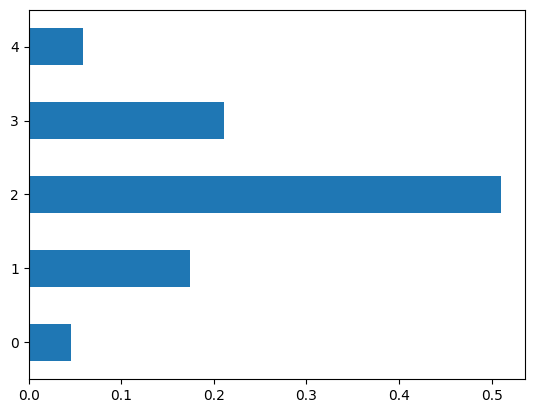

In [23]:
raw_df.Sentiment.value_counts(normalize=True).sort_index().plot(kind='barh')

Summarize your insights and learnings from the dataset below:

* most phrases have neutral sentiments
* very less phrases have negative sentiments

## Implement TF-IDF Technique

![](https://i.imgur.com/5VbUPup.png)

Outline:

1. Learn the vocabulary using `TfidfVectorizer`
3. Transform training and test data

#### Learn Vocabulary using `TfidfVectorizer `

* Create custom tokenizer with stemming
* Create a list of stop words
* Configure and create `TfidfVectorizer `
* Learn vocubulary from training set
* View sample entries from vocabulary

In [24]:
# convert text into tokens
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer

In [25]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [26]:
stemmer=SnowballStemmer(language='english')

In [27]:
def tokenize(text):
  return [stemmer.stem(token) for token in word_tokenize(text) if token.isalpha()] 

In [28]:
tokenize("is the ral life this {{hell}")

['is', 'the', 'ral', 'life', 'this', 'hell']

In [29]:
word_tokenize('her ia m {{} into a nunch of tokens')

['her', 'ia', 'm', '{', '{', '}', 'into', 'a', 'nunch', 'of', 'tokens']

In [30]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [31]:
from nltk.corpus import stopwords

In [32]:
english_stopwords=stopwords.words('english')

In [33]:
",".join(english_stopwords)

"i,me,my,myself,we,our,ours,ourselves,you,you're,you've,you'll,you'd,your,yours,yourself,yourselves,he,him,his,himself,she,she's,her,hers,herself,it,it's,its,itself,they,them,their,theirs,themselves,what,which,who,whom,this,that,that'll,these,those,am,is,are,was,were,be,been,being,have,has,had,having,do,does,did,doing,a,an,the,and,but,if,or,because,as,until,while,of,at,by,for,with,about,against,between,into,through,during,before,after,above,below,to,from,up,down,in,out,on,off,over,under,again,further,then,once,here,there,when,where,why,how,all,any,both,each,few,more,most,other,some,such,no,nor,not,only,own,same,so,than,too,very,s,t,can,will,just,don,don't,should,should've,now,d,ll,m,o,re,ve,y,ain,aren,aren't,couldn,couldn't,didn,didn't,doesn,doesn't,hadn,hadn't,hasn,hasn't,haven,haven't,isn,isn't,ma,mightn,mightn't,mustn,mustn't,needn,needn't,shan,shan't,shouldn,shouldn't,wasn,wasn't,weren,weren't,won,won't,wouldn,wouldn't"

In [34]:
selected_stopwords=english_stopwords[:115]

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [36]:
vectorizer=TfidfVectorizer(tokenizer=tokenize,stop_words=selected_stopwords,
                           ngram_range=(1,2),max_features=2000)

In [37]:
vectorizer.fit(raw_df.Phrase)

/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'doe', 'dure', 'onc', 'ourselv', 'themselv', 'whi', 'yourselv'] not in stop_words.
  warnings.warn(


TfidfVectorizer(max_features=2000, ngram_range=(1, 2),
                stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...],
                tokenizer=<function tokenize at 0x7fdddf5fd700>)

In [38]:
len(vectorizer.vocabulary_)

2000

In [39]:
vectorizer.get_feature_names_out()[:200]

array(['abandon', 'abil', 'abl', 'abov', 'absolut', 'absorb', 'abstract',
       'absurd', 'abus', 'accent', 'accept', 'access', 'accomplish',
       'accur', 'ach', 'achiev', 'across', 'act', 'action', 'action film',
       'action movi', 'action sequenc', 'actor', 'actress', 'actual',
       'ad', 'adam', 'adam sandler', 'adapt', 'add', 'addit', 'adequ',
       'admir', 'admit', 'adolesc', 'adult', 'adventur', 'affair',
       'affect', 'afraid', 'age', 'ago', 'ahead', 'aim', 'aimless', 'air',
       'alien', 'aliv', 'allen', 'allow', 'almost', 'alon', 'along',
       'alreadi', 'also', 'altern', 'although', 'alway', 'amateurish',
       'amaz', 'ambigu', 'ambit', 'ambiti', 'america', 'american',
       'among', 'amount', 'amus', 'analyz', 'angel', 'angst', 'ani',
       'anim', 'ann', 'annoy', 'anoth', 'answer', 'anyon', 'anyth',
       'apart', 'appar', 'appeal', 'appear', 'appli', 'appreci',
       'approach', 'appropri', 'area', 'argu', 'argument', 'around',
       'arriv', 'art'

### Transform Training & Test Data

* Transform phrases from training set
* Transform phrases from test set
* Look at some example values

In [40]:
inputs=vectorizer.transform(raw_df.Phrase)

In [41]:
inputs.shape

(156060, 2000)

In [42]:
inputs.toarray()[0][:200]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.27620188,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.33022325, 0.29314979, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [43]:
test_inputs=vectorizer.transform(test_df.Phrase)

In [44]:
test_df

,PhraseId,SentenceId,Phrase
0,156061,8545,An intermittently pleasing but mostly routine ...
1,156062,8545,An intermittently pleasing but mostly routine ...
2,156063,8545,An
3,156064,8545,intermittently pleasing but mostly routine effort
4,156065,8545,intermittently pleasing but mostly routine
...,...,...,...
66287,222348,11855,"A long-winded , predictable scenario ."
66288,222349,11855,"A long-winded , predictable scenario"
66289,222350,11855,"A long-winded ,"
66290,222351,11855,A long-winded


In [45]:
test_inputs.shape

(66292, 2000)

## Train Baseline Model & Submit to Kaggle

1. Split training and validation sets
2. Train logistic regression model
3. Study predictions on sample phrases
4. Make predictions and submit to Kaggle




### Split Training and Validation Sets

Tip: Don't use a random sample for validation set (why?)

In [46]:
train_size=100_000

In [47]:
train_inputs=inputs[:train_size]
train_targets=raw_df.Sentiment[:train_size]

In [48]:
train_inputs.shape,train_targets.shape

((100000, 2000), (100000,))

In [49]:
val_inputs=inputs[train_size:]
val_targets=raw_df.Sentiment[train_size:]

In [50]:
val_inputs.shape,val_targets.shape

((56060, 2000), (56060,))

### Train Logistic Regression Model



In [51]:
from sklearn.linear_model import LogisticRegression

In [52]:
model=LogisticRegression()

In [53]:
model.fit(train_inputs,train_targets)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [54]:
train_preds=model.predict(train_inputs)

In [55]:
train_targets

0        1
1        2
2        2
3        2
4        2
        ..
99995    2
99996    2
99997    3
99998    2
99999    4
Name: Sentiment, Length: 100000, dtype: int64

In [56]:
train_preds

array([3, 2, 2, ..., 2, 2, 2])

In [57]:
from sklearn.metrics import accuracy_score

In [58]:
accuracy_score(train_targets,train_preds)

0.64057

In [59]:
val_preds=model.predict(val_inputs)

In [60]:
accuracy_score(val_targets,val_preds)

0.5791651801641099

### Study Predictions on Sample Inputs

In [61]:
small_df=raw_df.sample(30)

In [62]:
small_inputs=vectorizer.transform(small_df.Phrase)

In [63]:
small_preds=model.predict(small_inputs)

In [64]:
small_preds

array([2, 3, 2, 2, 2, 2, 3, 3, 3, 2, 2, 2, 4, 2, 1, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 4, 2, 2, 2])

In [65]:
small_df

,PhraseId,SentenceId,Phrase,Sentiment
35277,35278,1658,we 'd live in if Argento 's Hollywood counterp...,3
134783,134784,7275,"people are innocent , childlike and inherently...",3
12255,12256,524,nausea,1
136587,136588,7384,"worn a bit thin over the years ,",1
129915,129916,6994,colonialism and empire,2
24891,24892,1135,seesawing,2
37936,37937,1804,"those susceptible to blue hilarity , step righ...",2
28670,28671,1327,"for a larger-than-life figure , an artist who ...",3
75041,75042,3848,is achingly honest and delightfully cheeky .,3
78391,78392,4032,you 're most likely to find on the next inevit...,2


### Make Predictions & Submit to Kaggle

1. Make predictions on Test Dataset
2. Generate & submit CSV on Kaggle
3. Add screenshot of your score 



In [66]:
test_preds=model.predict(test_inputs)

In [67]:
test_preds

array([3, 3, 2, ..., 2, 2, 1])

In [68]:
test_df

,PhraseId,SentenceId,Phrase
0,156061,8545,An intermittently pleasing but mostly routine ...
1,156062,8545,An intermittently pleasing but mostly routine ...
2,156063,8545,An
3,156064,8545,intermittently pleasing but mostly routine effort
4,156065,8545,intermittently pleasing but mostly routine
...,...,...,...
66287,222348,11855,"A long-winded , predictable scenario ."
66288,222349,11855,"A long-winded , predictable scenario"
66289,222350,11855,"A long-winded ,"
66290,222351,11855,A long-winded


In [69]:
sub_df

,PhraseId,Sentiment
0,156061,2
1,156062,2
2,156063,2
3,156064,2
4,156065,2
...,...,...
66287,222348,2
66288,222349,2
66289,222350,2
66290,222351,2


In [70]:
sub_df.Sentiment=test_preds

In [71]:
sub_df.to_csv('submission.csv',index=None)

In [72]:
!head submission.csv

PhraseId,Sentiment
156061,3
156062,3
156063,2
156064,3
156065,3
156066,3
156067,3
156068,2
156069,3


## Train & Finetune Different ML Models

Train & finetune at least 2 other types of models

Models to try:
- Decision Trees
- Random Forests
- Gradient Boosting
- Naive Bayes
- SVM

Optional: 
* Use PCA for dimensionality reduction
* Compare classification vs regression models


Tips: 

- If using a regression model, make sure to round predictions to integer and clip to the range `[1,5]`
- Track your progress in a copy of [this experiment tracking spreadsheet](https://docs.google.com/spreadsheets/d/1X-tifxAOAYeIA2J32hBGP5B0MPnZy_o-zOz1NbS-1Ig/edit?usp=sharing)


### Model 1

In [73]:
from sklearn.naive_bayes import MultinomialNB

In [74]:
model1=MultinomialNB()

In [75]:
model1.fit(train_inputs,train_targets)

MultinomialNB()

In [77]:
accuracy_score(train_targets,model1.predict(train_inputs))

0.58648

In [78]:
accuracy_score(val_targets,model1.predict(val_inputs))

0.5446664288262576

### Model 2

In [85]:
from sklearn.ensemble import RandomForestClassifier
model2=RandomForestClassifier(n_estimators=100,max_depth=5)

In [86]:
model2.fit(train_inputs,train_targets)

RandomForestClassifier(max_depth=5)

In [87]:
accuracy_score(train_targets,model2.predict(train_inputs))

0.51783

In [88]:
accuracy_score(val_targets,model2.predict(val_inputs))

0.49587941491259363

In [104]:
test_preds=model2.predict(test_inputs)

In [105]:
sub_df.Sentiment=test_preds

In [107]:
sub_df.to_csv('Submission2.csv',index=None)

In [108]:
!head Submission2.csv

PhraseId,Sentiment
156061,2
156062,2
156063,2
156064,2
156065,2
156066,2
156067,2
156068,2
156069,2


### Model 3

In [89]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [91]:
import xgboost as xgb

In [109]:
xgb_cl=xgb.XGBClassifier(max_depth=10)

In [110]:
xgb_cl.fit(train_inputs,train_targets)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [111]:
accuracy_score(train_targets,xgb_cl.predict(train_inputs))

0.67878

In [112]:
accuracy_score(val_targets,xgb_cl.predict(val_inputs))

0.5633785230110596

In [113]:
test_preds_model3=xgb_cl.predict(test_inputs)

In [114]:
test_preds

array([2, 2, 2, ..., 2, 2, 2])

In [115]:
sub_df.Sentiment=test_preds

In [116]:
sub_df.to_csv('Submission3.csv',index=None)

In [117]:
!head Submission3.csv

PhraseId,Sentiment
156061,2
156062,2
156063,2
156064,2
156065,2
156066,2
156067,2
156068,2
156069,2


Best Model:

Xg boost classifier, as its accuracy score is better than logistic regression, both shows same score in kaggle

(include Kaggle score screenshot)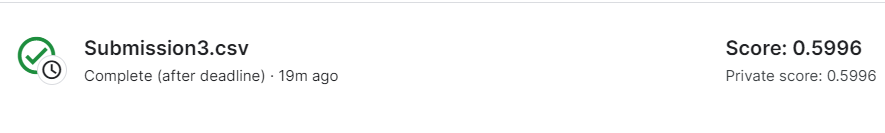

## Submission and Future Work


Future work:
- Try more machine learning models
- Try configuring CountVectorizer differently
- Try approaches other than bag of words
